<a href="https://colab.research.google.com/github/secutron/TesTime/blob/main/AL001_xShot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup of the environment

- Install dependencies
- Download the dataset

In [1]:
# install dependencies
!pip install --upgrade pip
!pip install kaggle --quiet
!pip install fastai --quiet
!pip install lightly --quiet

     |████████████████████████████████| 1.5MB 8.0MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 69 kB 4.3 MB/s 
     |████████████████████████████████| 122 kB 17.8 MB/s 
     |████████████████████████████████| 112 kB 38.1 MB/s 
     |████████████████████████████████| 665 kB 43.6 MB/s 
     |████████████████████████████████| 91 kB 7.7 MB/s 
     |████████████████████████████████| 829 kB 41.8 MB/s 
     |████████████████████████████████| 269 kB 44.6 MB/s 


In [2]:
# imports
import os
from fastai.vision import *

In [3]:
import warnings;
warnings.filterwarnings('ignore');

In [4]:
np.random.seed(42)
torch.manual_seed(42)

## 1.1 Download the dataset from Kaggle using their API

1. Go to https://www.kaggle.com/
1. Click on signin or register on top right to create/ login to your account
1. Once you created your account click on "My Account" go to https://www.kaggle.com/YOUR_USER_NAME/account 
  (replace YOUR_USER_NAME with your kaggle user name)
1. On your user account page scroll down and click on "Generate New API Token"
1. Your browser should now download a "kaggle.json" file with the credentials

In [12]:
!mkdir -p ~/.kaggle
# kaggle.json 업로드


In [16]:
!cd ~
!pwd

In [20]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [21]:
ls -1ha ~/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


In [26]:
!kaggle datasets download -d chetankv/dogs-cats-images --force

 99% 431M/435M [00:04<00:00, 117MB/s]
100% 435M/435M [00:05<00:00, 89.7MB/s]


In [27]:
# the downloaded dataset is a .zip archive. Let's unzip it
!unzip -q dogs-cats-images.zip;

# 2. Select the samples for few-shot learning

There are a few things we want to ensure when selecting the samples for few-shot learning

- we want the selected samples to cover the full space of our data (we prefer different images over very similar ones). This ensures that our model will be more robust to unseen data. Additionally, this prevents our model from overfitting. 
- we want only a "few" samples. Let's aim for 10 images in total

In order to select the data based on our preferences we use WhatToLabel and its python package borisml. The free version is sufficient and allows us to select the data exactly the way we want.

## 2.1 Create an account on Lightly

1. Go to app.lightly.ai
1. Signin to login to your existing account or signin to create a new one
1. Click on My Datasets
1. Click on "Create a new dataset"
1. You should now see a sample command for the CLI (command line interface) tool to upload images

We will now use the whattolabel CLI to upload our dataset.

In [ ]:
# replace with your token and dataset id 
TOKEN = 'PUT_YOUR_TOKEN_HERE'
DATASET_ID = 'PUT_YOUR_DATASET_ID_HERE'

In [ ]:
# we first use lightly to create an embedding of our dataset
# lightly uses self-supervised learning which allows it to create embeddings without labels
!lightly-magic input_dir='dog vs cat/dataset/training_set' hydra.run.dir=./ trainer.max_epochs=1 loader.batch_size=256 collate.input_size=64 

Downloading: "https://storage.googleapis.com/models_boris/whattolabel-resnet18-simclr-d16-w1.0-i-58852cb9.pth" to /root/.cache/torch/hub/checkpoints/whattolabel-resnet18-simclr-d16-w1.0-i-58852cb9.pth
100% 42.7M/42.7M [00:01<00:00, 25.5MB/s]
GPU available: True, used: True
[2020-08-25 14:22:41,202][lightning][INFO] - GPU available: True, used: True
TPU available: False, using: 0 TPU cores
[2020-08-25 14:22:41,202][lightning][INFO] - TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]
[2020-08-25 14:22:41,202][lightning][INFO] - CUDA_VISIBLE_DEVICES: [0]
2020-08-25 14:22:41.374309: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

  | Name      | Type         | Params
-------------------------------------------
0 | model     | ResNetSimCLR | 11 M  
1 | criterion | NTXentLoss   | 0     
[2020-08-25 14:22:42,387][lightning][INFO] - 
  | Name      | Type         | Params
------------------------------------

In [ ]:
# upload the samples and embeddings to the cloud
!lightly-upload input_dir='dog vs cat/dataset/training_set' embeddings='embeddings.csv' token=$TOKEN dataset_id=$DATASET_ID upload='thumbnails'

100% 8000/8000 [08:55<00:00, 16.29imgs/s]
  0% 0/8000 [00:00<?, ?embs/s]
  0% 32/8000 [00:01<06:12, 21.37embs/s]
  1% 64/8000 [00:02<06:09, 21.45embs/s]
  1% 96/8000 [00:04<06:14, 21.13embs/s]
  2% 128/8000 [00:06<06:16, 20.90embs/s]
  2% 160/8000 [00:07<06:12, 21.05embs/s]
  2% 192/8000 [00:09<06:11, 21.00embs/s]
  3% 224/8000 [00:10<06:06, 21.24embs/s]
  3% 256/8000 [00:12<06:03, 21.29embs/s]
100% 8000/8000 [09:10<00:00, 16.29imgs/s]
  4% 320/8000 [00:15<06:00, 21.32embs/s]
  4% 352/8000 [00:16<05:58, 21.35embs/s]
  5% 384/8000 [00:18<05:57, 21.30embs/s]
  5% 416/8000 [00:19<05:57, 21.21embs/s]
  6% 448/8000 [00:21<05:54, 21.33embs/s]
  6% 480/8000 [00:22<05:51, 21.39embs/s]
  6% 512/8000 [00:24<05:51, 21.31embs/s]
  7% 544/8000 [00:25<05:51, 21.23embs/s]
  7% 576/8000 [00:27<05:56, 20.84embs/s]
  8% 608/8000 [00:28<05:53, 20.88embs/s]
  8% 640/8000 [00:30<05:57, 20.60embs/s]
  8% 672/8000 [00:31<05:58, 20.45embs/s]
  9% 704/8000 [00:33<05:57, 20.39embs/s]
  9% 736/8000 [00:35<05:57,

## 2.2 Subsample the dataset on Lightly

1. Go back to app.lightly.ai
1. Open your dataset and click on Analyze & Filter -> Sampling
1. Create a new sampling with the "Coreset" or "Bit" sampling strategy
1. Once the sampling is completed use the slider on the right side to select around **10 images**
1. Save your selection by creating a new tag called **"tiny"** in the menu on the left

In [ ]:
# only change the following variables if you chose a different tag-name
TAG_NAME = 'tiny'

## 2.3 Download the dataset and annotate the images



In [ ]:
!lightly-download tag_name=$TAG_NAME input_dir='dog vs cat/dataset/training_set' output_dir='dog vs cat/dataset/tiny_set' token=$TOKEN dataset_id=$DATASET_ID 

rm: cannot remove 'dog vs cat/dataset/tiny_set': No such file or directory
Copying files from /content/dog vs cat/dataset/training_set to /content/dog vs cat/dataset/tiny_set.
100% 10/10 [00:00<00:00, 5330.84it/s]


# 3. Train a model with few-shot learning
In few-shot learning, a pre-trained model is finetuned on a tiny set of unseen images from a different task. In our case, the fastai model was pre-trained on ImageNet and we will now finetune it on the few selected images from the dogs-and-cats dataset.

In [ ]:
# specify the folder which holds train and eval sets
data = ImageList.from_folder('dog vs cat/dataset/')

In [ ]:
# train on the tiny dataset
data = data.split_by_folder(train='tiny_set', valid='test_set')

In [ ]:
# (the format of the filenames is dog.id.ext/cat.id.ext)
data = data.label_from_func(func=lambda o: os.path.basename(o).split('.')[0])

In [ ]:
# data augmentation
data = data.transform(get_transforms(do_flip=True, flip_vert=True), size=224)

In [ ]:
# data bunch
data = data.databunch(bs=4)

In [ ]:
# normalize images
data = data.normalize(imagenet_stats)

In [ ]:
# use a resnet-18 and keep track of evaluation accuracy
learner = cnn_learner(data, models.resnet18, metrics=[accuracy])

In [ ]:
learner.fit_one_cycle(8, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.031444,3.855588,0.499500,00:15
1,0.850145,2.136673,0.505500,00:15
2,0.888686,0.705422,0.702000,00:15
3,0.831019,0.400996,0.837000,00:15
4,0.828175,0.353600,0.866000,00:15
5,0.717481,0.336472,0.871000,00:15
6,0.635530,0.380449,0.856500,00:15
7,0.555728,0.368794,0.859000,00:15


# 4. Results
Let's look at how well our few-shot model performs. Keep in mind that the model was only trained on 10 sample images!

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)

The confusion matrix on the validation data is shown below. **The model achieves high accuracy (over 80%).**

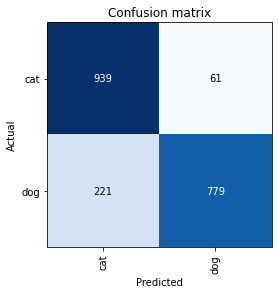

In [ ]:
interp.plot_confusion_matrix()

Let's now look at the images for which the loss of the model was the largest. 

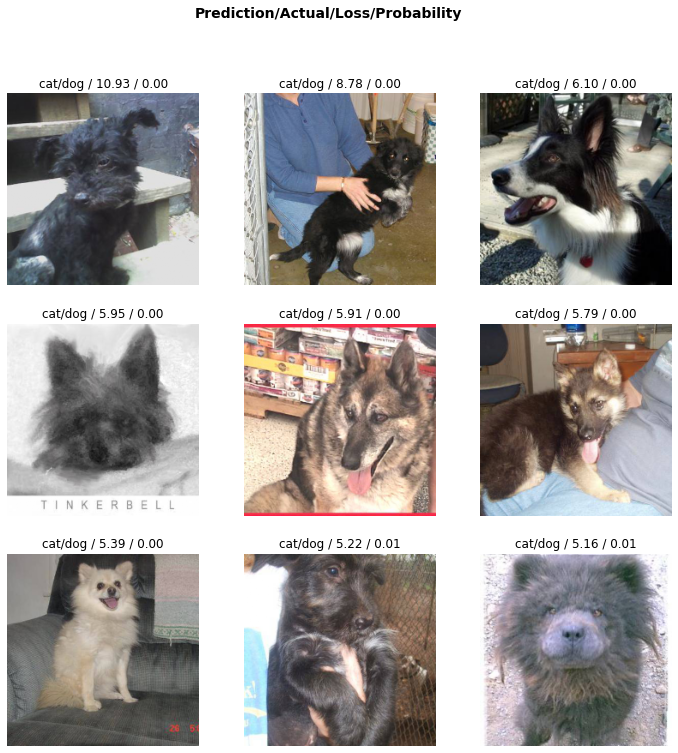

In [ ]:
interp.plot_top_losses(9, figsize=(12,12))